## Linear and Logistic Regression

The model for a linear regression in straightforward:
    $$ y = w x + b $$
Where $w$ and $b$ are the weights and the bias respectively we wish to learn.

In order to solve a given machine learning problem, one must find a way of constructing a function whose minima encode solutions to the real-world problem at hand. These encodings are performed by the <b>loss function</b>. There are several loss functions that can be used for different problems, and each problem has its optimal loss function.
Put another way, the loss function is the mechanism by which a project is transmuted into mathematics.

The loss function $\mathcal{L}$ is a function of the datapoint $x$ and labels $y$, then we have $\mathcal{L(x,y)}$. Note: $x$ and $y$ are in general tensors, and $\mathcal{L}$ maps the pairs of tensors to scalars. 
What should the functional form of the loss function be? The common assumption is to make the loss <i>additive</i>. Suppose that $(x_i,y_i)$ are the data available and that there are N total samples. Then the loss can be decomposed as:
$$\mathcal{L(x,y)} = \sum_{i=1}^{N} \mathcal{L_i(x_i,y_i)} $$

This decomposition allows for many useful advantages. The first is that derivatives factor through addition, so computing the gradient of the total loss simplifies as follows:
$$\nabla\mathcal{L(x,y)} = \sum_{i=1}^{N} \nabla\mathcal{L_i(x_i,y_i)}$$

For regression problem we have the <b>$L^2$ loss </b>.
$$\mathcal{L(x,y)} = || f(x) - y ||_2$$

#### Gradient descent

We have explained that machine learning is the act of minimising suitably defined loss functions. That is, we attempt to find arguments to the loss funciton that minimise it. 
However we recall that $(x,y)$ are fixed quantities that cannot be changed. So, what arguments of $\mathcal{L}$ are we changing during learning?

Defining learnable weights W. Suppose $f(x)$ as a differentiable function we wish to fit with our machine learning model. We will dictate that $f$ is parametrized by choice of W. That is, our function actually has two arguments $f(W,x)$. Fixing the value of W we obtain a function that depends only on datapoints $x$. These learnable weights are the quantities selected by minimisation of the loss function.

But now, supposing we have encoded our learning problem with a suitable loss function, how can we find minima of this loss in practice? The key is the <b>gradient descent</b>.
Suppose $f$ as a function that depends on some weights W. Then $\nabla W$ denotes the direction change in W that would maximally increase $f$. It follows that taking a step in the opposite direction would get us closer to the minima of $f$.

Note: it's convenient to write 
$$\nabla W = \frac{\partial \mathcal{L}}{\partial W}$$.

Then the idea of gradient descent is to find the minima of functionsby repeatedly following the negative gradient. Algorithmically, this update rule can be expressed as:

$$W = W - \alpha\nabla W$$

where $\alpha$ represents the step-size of the updating process, it is called <i>learning rate</i>. Note that $\nabla W$ is itself a function of W, so the actual step changes at each iteration. Each step performs an update to the weights matrix W. This iterative process is called <i>learning</i>

## Perceptron


Proposed in 1958 by Rosenblatt (American psicologist) it is an entity with an input layer $x$, a binary output layer $y$, and a single cell containing the learning algorithm based on the minimization of an error function.
It falls into the class of linear discriminant models through the action of a nonlinear transformation on the input vector. Mathematically:

$$\begin{equation}y(x,w) = f\big{(}\sum_{j=1}^{M} w_{j}\phi_{j}(x)\big{)}\end{equation}$$

Where $x$ is the input vector, $w$ is the adaptive "weights" vector associated with $x$, $y$ is the output and $\phi$ is the fixed (non adaptive) nonlinear funciton of the input. The non linear function. $f(\bullet)$ is given by a step function of the form:

$$\begin{equation} f(a) = \begin{cases} +1, \quad a \ge 0 \\ -1, \quad a \lt 0 \end{cases} \end{equation}$$

For the perceptron it is more convenient to use as target values $t = +1$ for class $C_1$ and $t=-1$ for class $C_2$ which match the choice for the activation function.



The algorithm used to determine the adaptive parameters $w$ relies on the minimization of an appropriate error function. A natural choice of error function would be the total number of misclassified patterns. However this does not lead to a simple learning algorithm. We will use the **perceptron criterion**. We are seeking for an error function such that patterns $x_n$ in class $C_1$ will have $w^{T}\phi(x_n) \gt 0$ whereas patterns in class $C_2$ have $w^{T}\phi(x_n) \lt 0$. Using the $t \in {-1, +1}$ target coding it naturally follows that we would like that for all patterns $x_n$   :   $w^{T}\phi(x_n)t_n \gt 0$. Therefore the perceptron criterion associates zero with each pattern correctly classified whereas for a misclassified pattern $x_n$ it tries to minimize the error function:

$$\begin{equation}E_{P}(w) = - \sum_{n \in M} w^{T}\phi(x_n)t_{n} \end{equation}$$

Where $M$ denotes the set of all misclassified patterns. The error function is a linear function of the weights in the region of misclassification and 0 in the region of a correct classification and therefore it is piecewise linear.
This is really important for the next part. 

Suppose we randomly choose our initial weight vector and then compute the error function associated, how can the machine adapt the weight vector for the best possible classification of patterns $x_n$? . The technique used for the weight update is called **Stochastic gradient descent**. Given $w^{\tau}$ the weight vector at the $\tau$ iteration then:

$$\begin{equation} w^{\tau + 1} = w^{\tau} -\eta\nabla E_P(w) = w^{\tau} + \eta \phi_{n}t_{n} \end{equation}$$

Where $\eta$ is the learning rate parameter, it sets the precision of our model to find the minimum of the error function but maximize the convengerce time. Large $\eta$ means big steps, less precision but few iterations. On the other hand a small $\eta$ means good approximation of the minimum of the error function but more iterations and more computational time. Note that as the iteration goes on the set of misclassified patterns $M$ will change with the vector $w$.


The perceptron is the logic unit we will use to build our models. In order to implement a perceptron or a multi-layer perceptron is important to understand the logic bearing behind. For this purpose is important to understand the computational graphs. These graphs are the representation of the implementation of the algorithm. for example: given 3 input variables, the computational graphs of the function
$$f(x) = sign(\sum_i w_ix_i + b$$
is the following:

# <img style="text-align: left" src="./images/computational_graphs.png" width="40%" />

Where: <ol>
    <li> White nodes correspond to input and outputs; </li>
    <li> Red nodes correspond to model parameters; </li>
    <li> Blue nodes correspond to intermediate operations. </li>
    </ol>
 
Clearly, in terms of tensor operation, f can be rewritten as:
$$f(x) = sign(\textbf{w}^T\textbf{x}) + b$$
for which the correspondingcomputational graphs of f is:
<img style="text-align: left" src="./images/computational_graphs_vec.png" width="40%" />

We have now to implement our algorithm, following these computational graphs.

### Toy dataset with numpy

In [1]:
#Generating a dataset with numpy.
import numpy as np

N = 1000

w = 5
b = 2
noise = 0.2

x = np.random.rand(N,1) #Random values from uniform distrib in [0,1]
ns = np.random.normal(scale = noise, size = (N,1))

y = np.reshape(w*x + b + ns, (-1))


In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))
plt.scatter(x,y,color = 'orange')
plt.xlabel("y")
plt.ylabel("x")
plt.title("Toy Linear Regression Data, "
        r"$y = {}x + 2 + Noise(0, {})$".format(w,b,ns))
plt.show()

<Figure size 1000x800 with 1 Axes>

#### Placeholders

A placeholder is a way to put information into a tensorflow computation graph. 

In [3]:
import tensorflow as tf
ph = tf.placeholder(tf.float32, shape = (2,2))
ph

<tf.Tensor 'Placeholder:0' shape=(2, 2) dtype=float32>

Recall that in TF we can evaluate tensors by using sess.run(var). How do we feed in values for placeholders in our TF computations? 
We can build <i>feed dictionaries</i>. These are python dictionaries that map TF tensors to np.ndarray objects that contain the concrete values for these placeholders. This is best viewed as an inout to a TF computation graph. And the output?
TF calls these output <i>fetches</i>. 

In [4]:
a = tf.placeholder(tf.float32, shape = (2,))
b = tf.placeholder(tf.float32, shape = (2,))
c = a + b

x = np.array([1.,2.])
y = np.array([2.,3.])
with tf.Session() as sess:
    dic = {a : x, b: y}
    c_eval = sess.run(c, dic) #broadcasting
    print(c_eval)

[3. 5.]


#### Name scopes

In complicated TF programs, there will be many tensors, variables and placehoders defined. <code>tf.name_scope(name)</code> provides a simple scoping mechanism for managing these collections of variables. All the computational graph elements created within the scope of <code>tf.name_scope(name)</code> call will have <b>name</b> prepended to their names.

In [5]:
N = 10

with tf.name_scope("placeholders"):
    x = tf.placeholder(tf.float32, (N,1))
    y = tf.placeholder(tf.float32, (N,))

x

<tf.Tensor 'placeholders/Placeholder:0' shape=(10, 1) dtype=float32>

### Optimizers

The missing piece is that we still don't know how to perform gradient descent using TF. 
TF provides a collection of optimization algorithms in the <code>tf.train</code> module. These algorithms can be added as nodes to the TF computation graph.

In [6]:
W = tf.fill((10,10), value = 1.)

with tf.Session() as sess:
    red_sum = tf.reduce_sum(W)
    red_sum.eval()

In [7]:
learning_rate = .001
W = tf.Variable((10.,))
l = tf.reduce_sum(W)
with tf.name_scope("optim"):
    train_op = tf.train.AdamOptimizer(learning_rate).minimize(l)

### Taking gradients with TensorFlow

We can directly implement gradient descent algorithms in TF.

In [8]:

with tf.Session() as sess:
    W = tf.fill((3,3),value = 3.)
    l = tf.reduce_sum(W)
    gradW = tf.gradients(l,W)
    print("Gradient object:", (gradW))
    print("Type: ",(type(gradW)))
    print("Gradient computed:\n ",(gradW[0].eval()))

Gradient object: [<tf.Tensor 'gradients/Sum_2_grad/Tile:0' shape=(3, 3) dtype=float32>]
Type:  <class 'list'>
Gradient computed:
  [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


This piece of code symbolically pulls down the gradients of loss <i>l</i> with respect to learnable parameter (<code>tf.Variable</code>)W. 
<code>tf.gradients</code> returns a list of the desired gradients. Note that the radients are themselves tensors! 
TF performs symbolic differentiation, which means that gradients themselves are parts of the computational graph.

Gettin a visual understanding of the structure of a tensorial program can be very useful. The TF team provides the TensorBoard package for this purpose. TensorBoard starts a web servers that displays various useful visualizations of a TensorFlow program. However, in order for TF programs to be inspected with TensorBoard, programmers must manually write logging statements. <code>tf.train.FileWriter()</code> speifies the logging directory for a TensorBoard program, and <code>tf.summary</code> writes sumaries of various TensorFlow variables to the specified loggign directory. We will use <code>tf.summary.scalar</code> which sumarizes a scalar quantity, to track the value of the loss function. <code>tf.summary.merge_all()</code> is a useful logging aid that merges myltiple summaries into a single summary for convenience.

In [9]:
with tf.name_scope("summaries"):
    
    tf.summary.scalar("loss",l)
    merged = tf.summary.merge_all()
    
train_writer = tf.summary.FileWriter("./Output/lr-train", tf.get_default_graph())

##### Training models with TF

Suppose now that we have specified placeholders for datapoints and labels, and have defined a loss with tensorial operations. We have added an optimizer node <code>train_op</code> to the computational graph, which we can use to perform gradient descent steps.
To perform iteratively the gradient descent we can use a for-loop. 


In [10]:
#Generating a dataset with numpy.
import numpy as np
import tensorflow as tf

N = 1000

w = 5
b = 2
noise = 0.2

x_np = np.random.rand(N,1) #Random values from uniform distrib in [0,1]
ns = np.random.normal(scale = noise, size = (N,1))

y_np = w*x_np + b + ns



In [11]:
tf.reset_default_graph()

with tf.name_scope("placeholders"):
    
    x = tf.placeholder(tf.float32, (N,1)) #tensor for the x-variable
    y = tf.placeholder(tf.float32, (N,1)) #tensor for the y-variable
    
with tf.name_scope("weights"):
    
    W = tf.Variable(tf.random_uniform((1,1), minval=-0.1, maxval=0.1)) #Weights
    b =  tf.Variable(tf.random_uniform((1,), minval=-0.1, maxval=0.1)) #bias
    
with tf.name_scope("prediction"):
    
    y_pred = tf.matmul(x,W) + b #prediction
    
with tf.name_scope("loss"):
    
    #l = tf.reduce_sum((y - y_pred)**2)
    l = tf.losses.mean_squared_error(labels=y, predictions=y_pred) / 2. #loss function
    
with tf.name_scope("optim"):
    
    train_op = tf.train.AdamOptimizer(.001).minimize(l) #train operation
    
with tf.name_scope("summaries"):
    
    tf.summary.scalar("loss",l)
    merged = tf.summary.merge_all()
    
train_writer = tf.summary.FileWriter('./Output/lr-train1', tf.get_default_graph())

W1213 19:00:08.543423 140099817998144 deprecation.py:323] From /home/wahid/Programs/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/losses/losses_impl.py:121: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
n_steps = 10000

loss = []

with tf.Session() as sess1:
    
    sess1.run(tf.global_variables_initializer())
    #print(tf.global_variables_initializer())
    
    for i in range(n_steps):
        
        feed_dict = {x: x_np, y: y_np}
        
        _,summary,loss_v = sess1.run([train_op, merged, l], feed_dict = feed_dict)
        #print("step %d, loss: %f" % (i,loss))
         
        loss.append(loss_v)
        train_writer.add_summary(summary,i)
   
    
    out = sess1.run([y_pred], feed_dict = {x: x_np})    
   
    #print(type(out))
    
    

In [13]:
#!tensorboard --logdir=./Output/lr-train1

<img style="text-align: left" src="./images/logic_reg.png" width="50%" />

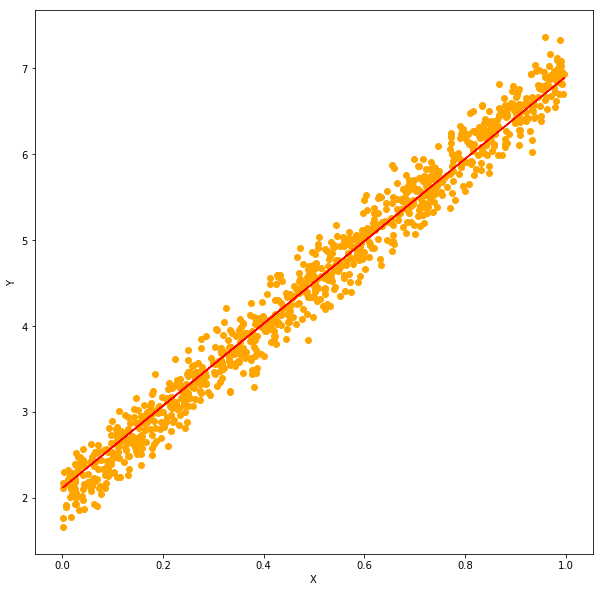

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.plot(x_np, out[0], color = 'red')
plt.scatter(x_np,y_np, color = 'orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

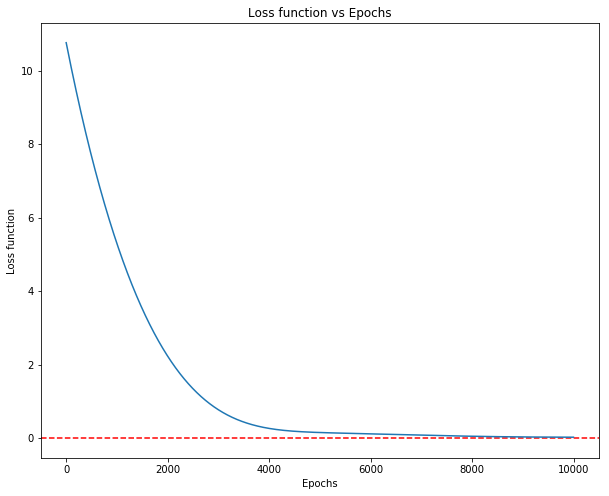

In [15]:
fig = plt.figure(figsize = (10,8))
plt.title("Loss function vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss function")
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.plot(loss)